## **Analiza Głównych Składowych (PCA) w analizie danych nowotworów złośliwych piersi**

**Cel ćwiczenia**

Celem tego ćwiczenia jest zapoznanie się z metodą Analizy Głównych Składowych (PCA) oraz ocena wpływu redukcji wymiarowości na wydajność algorytmów klasyfikacji.

**Wstęp teoretyczny**

Co to jest PCA?

Analiza Głównych Składowych (PCA) jest techniką statystyczną pozwalającą na redukcję wymiarów danych poprzez przekształcenie do nowej przestrzeni, gdzie składowe są liniowo niezależne i wyjaśniają maksymalną wariancję danych. Jest to metoda wykorzystywana do wydobywania istotnych informacji z złożonych zbiorów danych oraz do ułatwienia wizualizacji danych wielowymiarowych.

**Matematyczne podstawy PCA**

PCA rozpoczyna się od skonstruowania macierzy kowariancji, która mierzy wzajemne zależności pomiędzy parami zmiennych. Następnie, poprzez rozkład własny tej macierzy, identyfikowane są wektory własne, które reprezentują kierunki maksymalnej wariancji danych, oraz wartości własne, które wskazują na wielkość wariancji wyjaśnionej przez odpowiadające im wektory własne.

**Zastosowanie PCA**

Główne zastosowania PCA obejmują:

**Redukcja wymiarów:** Pozwala to na zmniejszenie złożoności obliczeniowej modeli i walkę z przekleństwem wymiarowości.

**Wizualizacja danych:** Ułatwia wizualne przedstawienie danych wielowymiarowych na 2D lub 3D wykresach.

**Selekcja cech:** Identifikuje najbardziej informatywne cechy, które mogą poprawić wydajność algorytmów uczenia maszynowego.

## **Krok 1: Przygotowanie Danych i Wstępna Eksploracja**

Zestaw danych dotyczy nowotworów złośliwych piersi i zawiera różne cechy morfologiczne i teksturalne obrazów cytologicznych, które mogą być wykorzystane do predykcji rodzaju nowotworu. Poniżej znajduje się kod służący do wczytania i wstępnej eksploracji danych.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Wczytanie danych
data_path = 'data.csv'
data = pd.read_csv(data_path)
# data = data.drop(columns=['diagnosis'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [107]:
# Usunięcie kolumny, która nie jest potrzebna
data_cleaned = data.drop(columns=['Unnamed: 32'])

# Podstawowe informacje o danych
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [108]:
# Podstawowe statystyki dla danych
basic_stats = data_cleaned.describe()
basic_stats.head(8)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



**Sprawdzanie liniowości związku między zmiennymi**

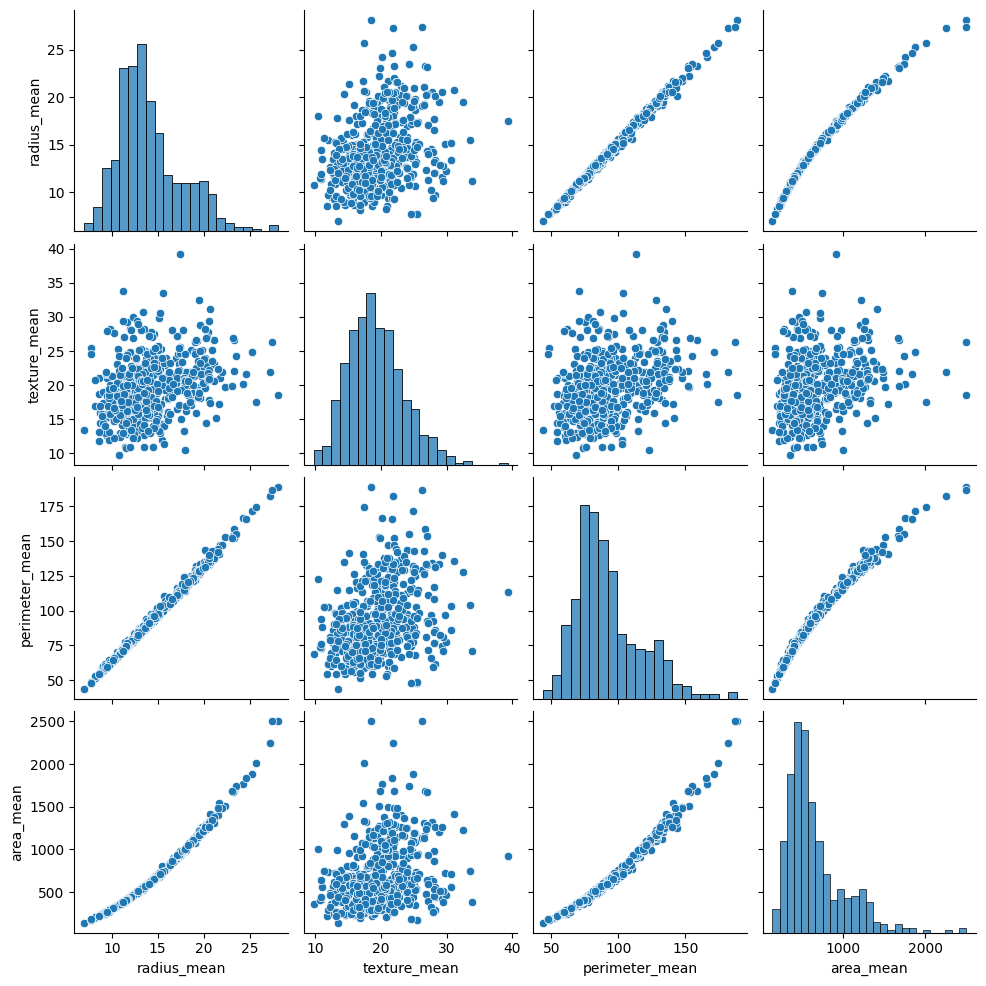

In [109]:
# Lista zmiennych do analizy
wybrane_cechy_do_analizy = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# Pairplot dla wybranych cech
sns.pairplot(data_cleaned[wybrane_cechy_do_analizy])

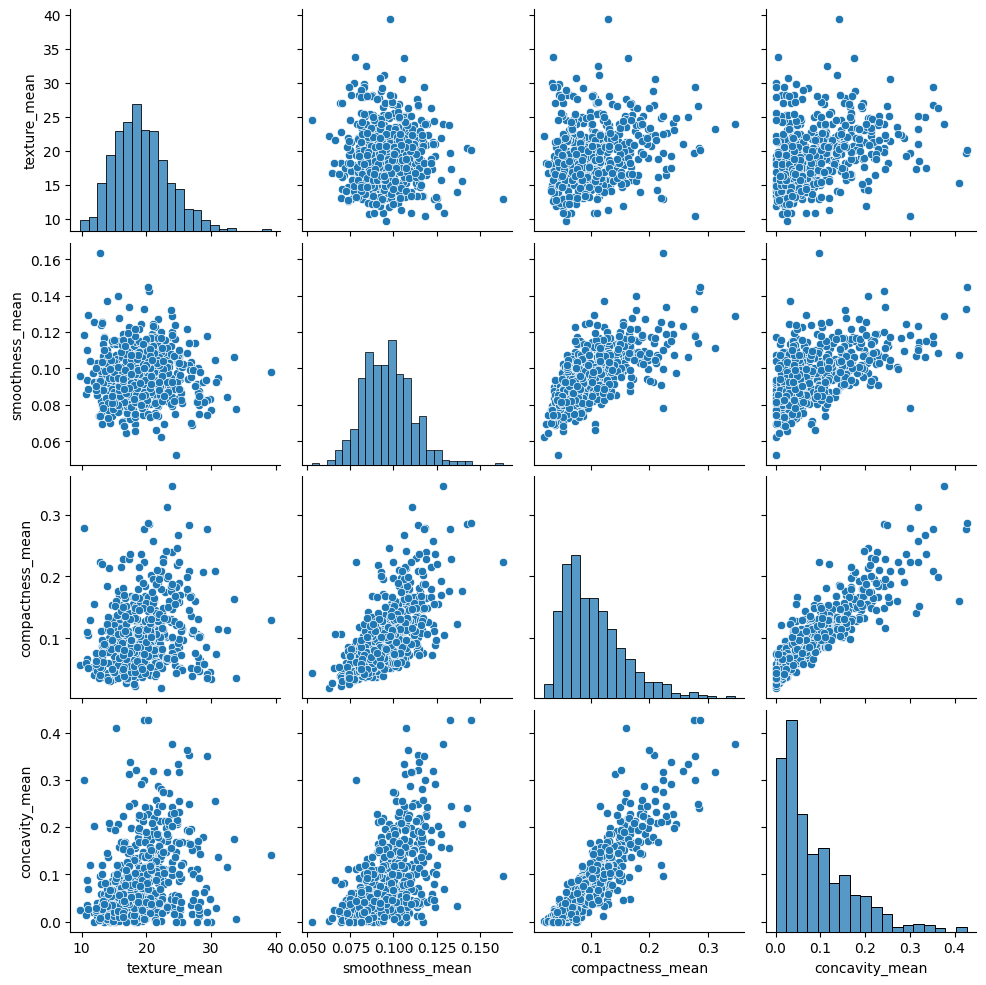

In [110]:
wybrane_cechy_do_analizy = ['texture_mean', "smoothness_mean", "compactness_mean", "concavity_mean"]

# Pairplot dla wybranych cech
sns.pairplot(data_cleaned[wybrane_cechy_do_analizy])

**Macierz Korelacji Spearmana**

Macierz korelacji Spearmana opiera się na współczynnikach rangowych i jest używana, gdy nie można założyć normalności rozkładów analizowanych zmiennych lub gdy związki między zmiennymi nie są liniowe. Współczynnik korelacji rang Spearmana również mieści się w przedziale od -1 do 1 i interpretowany jest podobnie do współczynnika Pearsona, lecz odnosi się do zależności monotonicznych, a nie wyłącznie liniowych.
H0: Nie ma zależności pomiędzy zmiennymi.
H1: Jest zależność pomiędzy zmiennymi.

C:\Users\j.mazur\AppData\Local\Temp\ipykernel_7560\416705424.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  spearman_p_values_formatted = spearman_p_values_matrix.applymap(lambda x: f'{x:.4f}' if pd.notnull(x) else 'NaN')


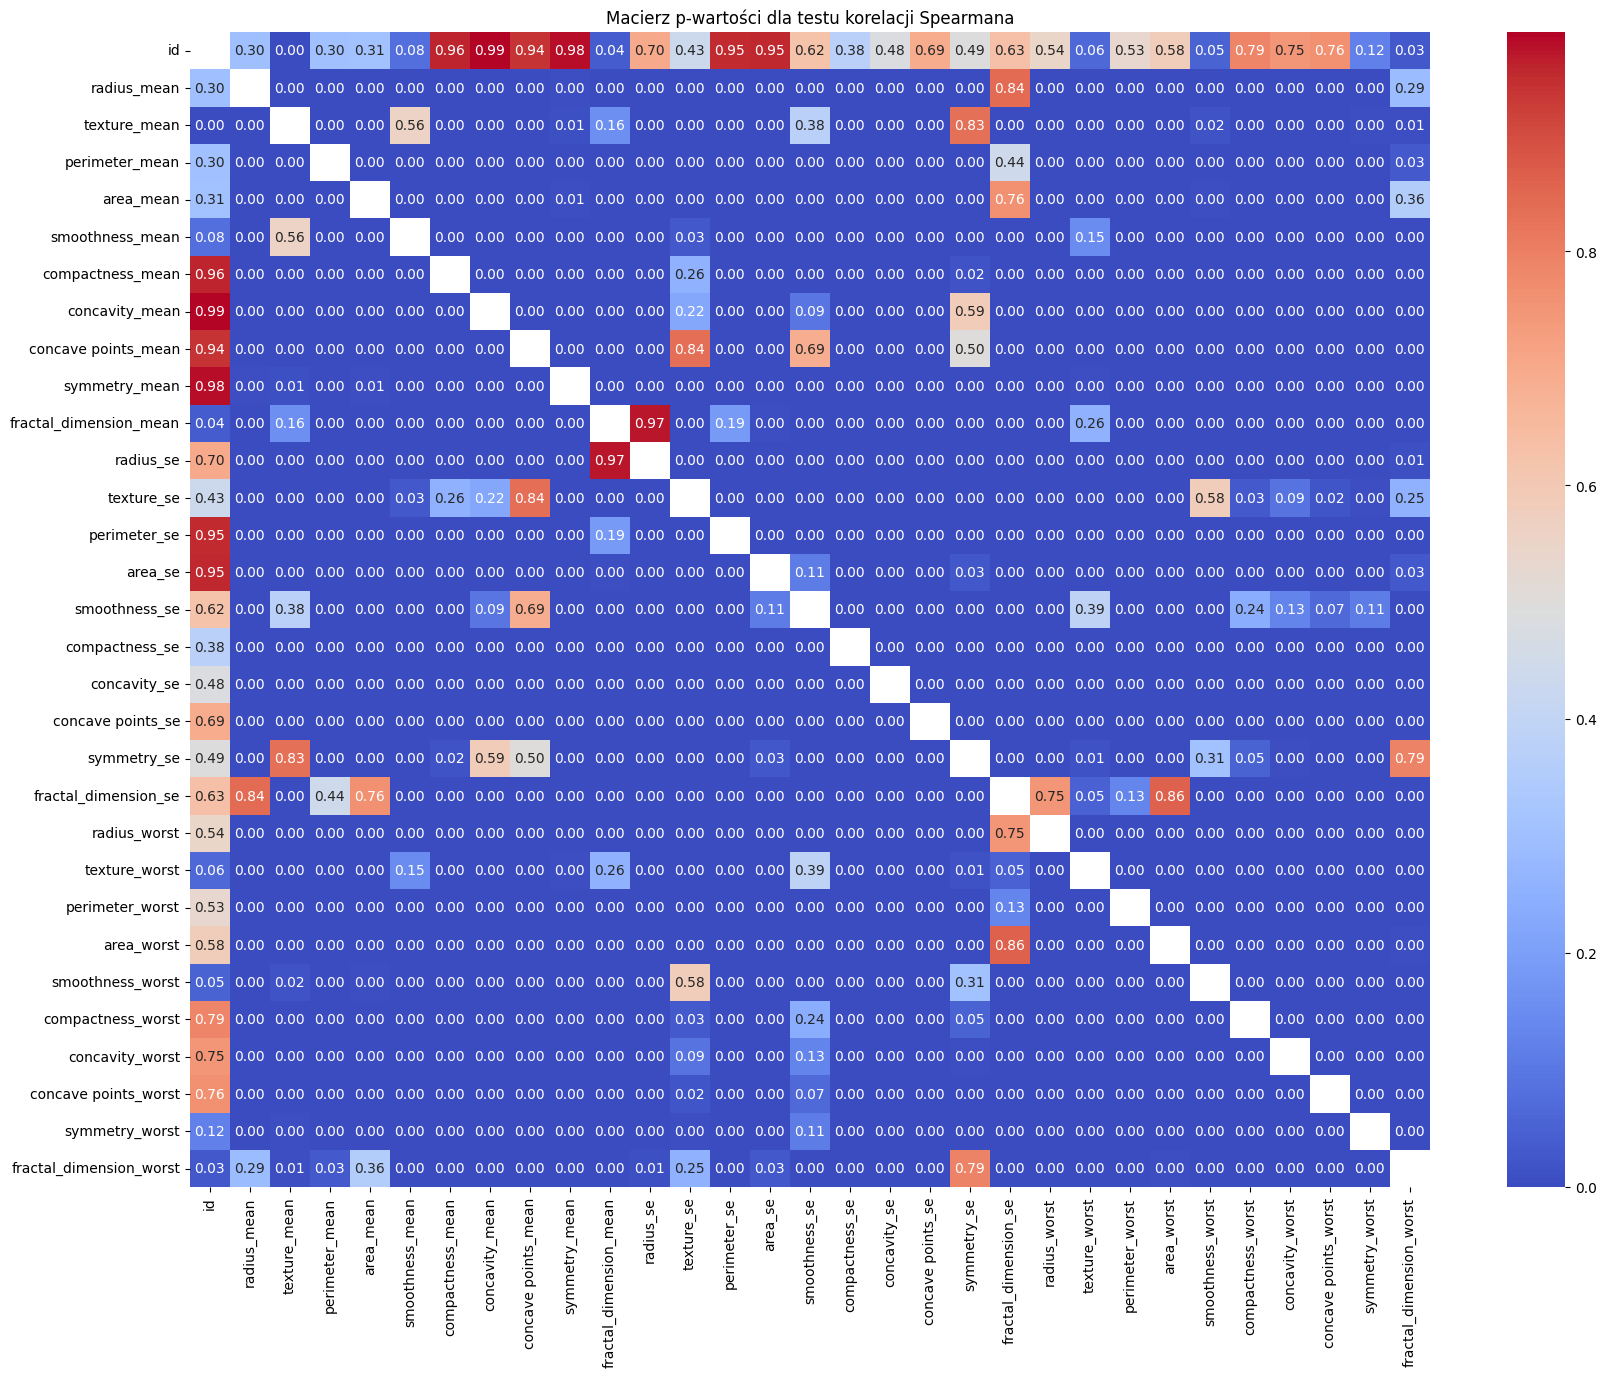

In [111]:
from scipy.stats import spearmanr

# Wykonanie testu korelacji Spearmana dla wszystkich par cech
spearman_corr_matrix = data_cleaned.drop(columns=["diagnosis"]).corr(method='spearman')
spearman_p_values_matrix = pd.DataFrame(index=spearman_corr_matrix.columns, columns=spearman_corr_matrix.columns)

for row in spearman_corr_matrix.columns:
    for col in spearman_corr_matrix.columns:
        if row != col:
            # Spearman's correlation test
            spearman_corr, p_value = spearmanr(data_cleaned[row], data_cleaned[col])
            spearman_p_values_matrix.loc[row, col] = p_value
        else:
            # Dla tej samej zmiennej ustawiamy NaN
            spearman_p_values_matrix.loc[row, col] = np.nan

# Ustawienie odpowiedniego formatowania dla lepszej czytelności
spearman_p_values_formatted = spearman_p_values_matrix.applymap(lambda x: f'{x:.4f}' if pd.notnull(x) else 'NaN')

# Wizualizacja p-wartości dla testu korelacji Spearmana
plt.figure(figsize=(20, 15))
sns.heatmap(spearman_p_values_matrix.astype(float), annot=True, fmt='.2f', cmap='coolwarm', mask=np.eye(len(spearman_corr_matrix)))
plt.title('Macierz p-wartości dla testu korelacji Spearmana')
plt.show()

Zadania dla studentów:

Dlaczego przed przystąpieniem do wyrysowania macierzy korelacji sprawdzamy liniowość związku między zmiennymi?

Dlaczego wybraliśmy metoda Spearmana, a nie Pearsona?

Co oznacza dla naszej analizy fakt, że niektóre zmienne są ze sobą skorelowane?

Rozwiązania:




## **Krok 2: Analiza PCA**

Analiza głównych składowych (PCA) to technika statystyczna stosowana do redukcji wymiarów, która przekształca oryginalne zmienne w nowy zestaw zmiennych nieskorelowanych, zwanych głównymi składowymi. Główne składowe są wyznaczane w taki sposób, aby pierwsza składowa wyjaśniała jak najwięcej wariancji danych, a każda kolejna - maksymalną wariancję pod warunkiem bycia ortogonalną do poprzednich.

**Standaryzacja danych**

Przed przystąpieniem do PCA ważne jest standaryzowanie danych, aby wszystkie cechy miały średnią równą 0 i odchylenie standardowe równą 1. Jest to niezbędne, ponieważ PCA jest wrażliwa na skale cech, a standaryzacja zapewnia, że wszystkie cechy będą miały równe znaczenie.

In [112]:
# Wykonanie standaryzacji danych
from sklearn.preprocessing import StandardScaler

# Kolumny, które będziemy standaryzować (wszystkie cechy oprócz 'diagnosis')
features = data_cleaned.drop(columns=['diagnosis']).columns

# Standaryzacja danych
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data_cleaned[features])

**Obliczenie macierzy kowariancji**

Po standaryzacji danych następnym krokiem jest obliczenie macierzy kowariancji. Macierz kowariancji pokazuje, jak cechy są ze sobą wzajemnie powiązane. Dla PCA, jest to kluczowy krok, ponieważ wartości własne i wektory własne tej macierzy określają główne składowe.

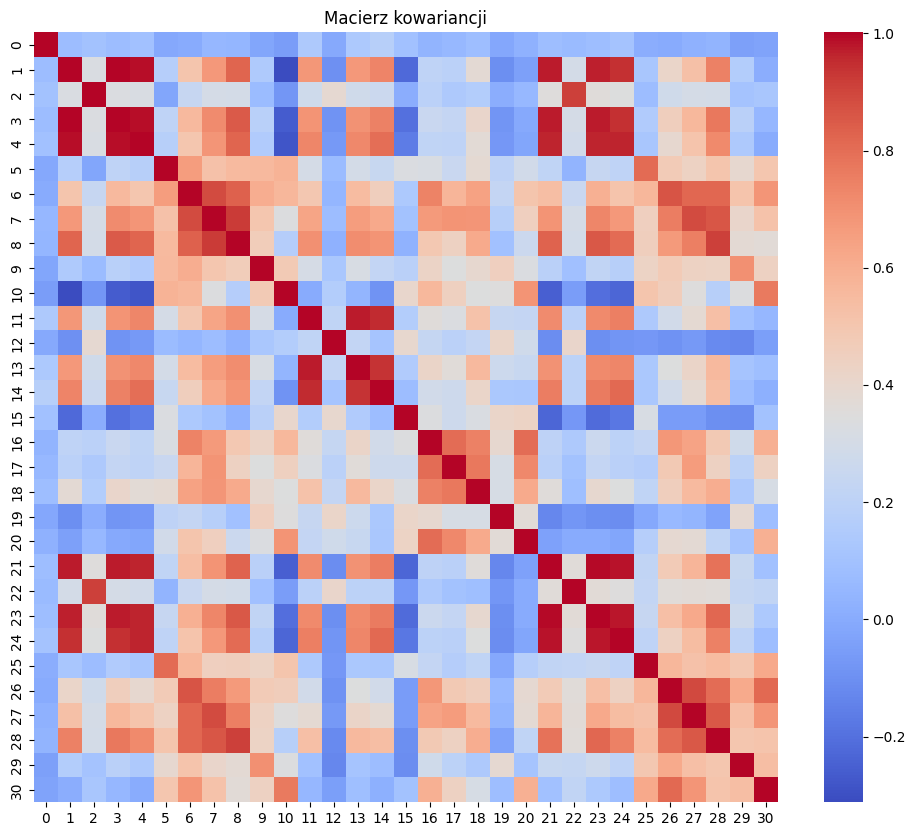

In [113]:
# Obliczenie macierzy kowariancji
cov_matrix = np.cov(X_normalized.T)

# Wizualizacja macierzy kowariancji
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Macierz kowariancji')
plt.show()

**Wartości i wektory własne macierzy kowariancji**

Wartości własne macierzy kowariancji reprezentują wielkość wariancji, którą każda składowa uchwyci, podczas gdy wektory własne reprezentują kierunki (lub główne składowe) wzdłuż których znajduje się ta wariancja.

**Wybór głównych składowych**

Nie wszystkie główne składowe są równie ważne. Zwykle wybieramy tylko kilka pierwszych głównych składowych, które uchwycą większość wariancji w danych. Wybór ten często jest ułatwiony przez wykonanie scree plotu, który pokazuje wartości własne w kolejności malejącej.

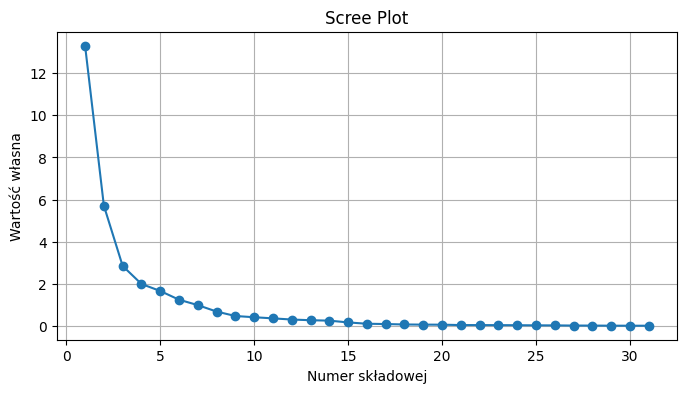

In [114]:
# Wartości i wektory własne macierzy kowariancji
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues[::-1], 'o-')
plt.title('Scree Plot')
plt.xlabel('Numer składowej')
plt.ylabel('Wartość własna')
plt.grid()
plt.show()

**Wizualizacja wektorów własnych**

Wizualizacja wektorów własnych daje nam intuicyjne zrozumienie kierunków największej wariancji w danych. To pozwala nam zobaczyć, w jakim kierunku dane będą rzutowane.

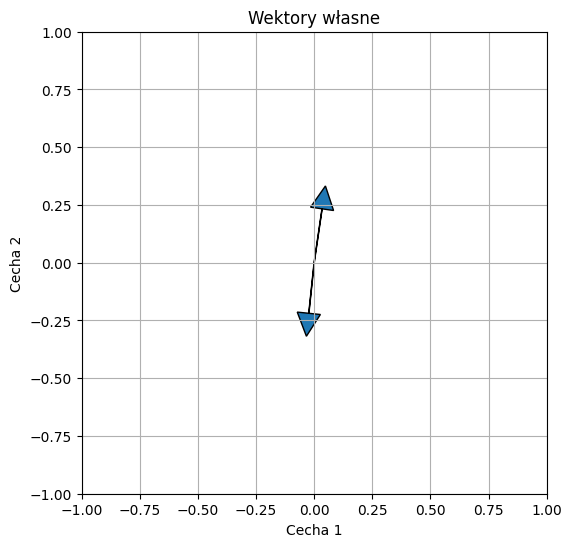

In [115]:
# Wybór dwóch głównych składowych
n_components = 2
selected_eigenvectors = eigenvectors[:, -n_components:]

# Wizualizacja wektorów własnych
plt.figure(figsize=(6, 6))
for i in range(n_components):
    plt.arrow(0, 0, selected_eigenvectors[0, i], selected_eigenvectors[1, i], head_width=0.1, head_length=0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Wektory własne')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.grid()
plt.show()

**Obliczenie nowych składowych**

Po wybraniu wektorów własnych używamy ich do transformacji danych do nowej przestrzeni, gdzie osie są zdefiniowane przez te wektory. W rezultacie otrzymujemy zredukowaną reprezentację danych w nowej przestrzeni o mniejszej wymiarowości.

**Wizualizacja danych w nowej przestrzeni PCA**

Ostatnim krokiem jest wizualizacja danych w nowej przestrzeni utworzonej przez pierwsze główne składowe. To pozwala na ocenę, jak dobrze składowe oddzielają różne klasy w danych, co jest szczególnie użyteczne w kontekście uczenia maszynowego i analizy danych.

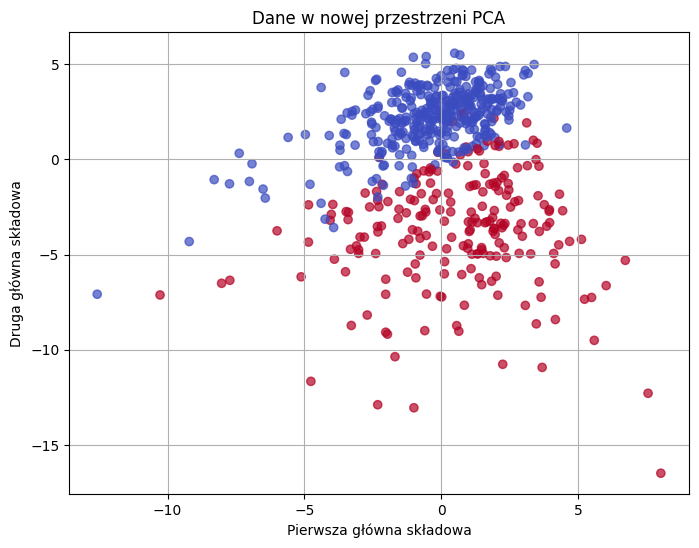

In [116]:
# Obliczenie nowych składowych
X_reduced_manual = np.dot(X_normalized, selected_eigenvectors)

# Przekonwertowanie etykiet 'M' i 'B' na wartości numeryczne
y_numeric = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# Wizualizacja danych w nowej przestrzeni PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_manual[:, 0], X_reduced_manual[:, 1], c=y_numeric, cmap='coolwarm', alpha=0.7)
plt.title('Dane w nowej przestrzeni PCA')
plt.xlabel('Pierwsza główna składowa')
plt.ylabel('Druga główna składowa')
plt.grid()
plt.show()


Zadania dla studentów:

Na podstawie scree plotu oszacuj, ile głównych składowych powinno zostać zachowanych, aby uchwycić większość wariancji w danych. Uzasadnij swój wybór.

Oceń, jak zmieniają się kierunki wektorów własnych po normalizacji danych. Czy wektory własne wskazują na kierunki o największej zmienności danych?

W jaki sposób macierz kowariancji różni się od macierzy korelacji i jak należy interpretować macierz kowariancji?

Rozwiązania:


## **Krok 3: Wykorzystanie PCA z biblioteki scikit-learn**

Teraz, gdy zrozumieliśmy podstawy i ręczne podejście do PCA, użyjemy biblioteki scikit-learn, która dostarcza gotowe i zoptymalizowane narzędzia do przeprowadzenia tej analizy. Użycie PCA z scikit-learn znacznie upraszcza proces i jest powszechnie stosowane w praktycznych zastosowaniach analizy danych i uczenia maszynowego.

**Wykonanie PCA za pomocą scikit-learn**

Scikit-learn oferuje obiekt PCA, który automatyzuje większość kroków, które wykonaliśmy ręcznie, w tym standaryzację danych (jeśli jest wymagana), obliczanie macierzy kowariancji, a także znajdowanie wartości i wektorów własnych. Możemy również określić liczbę składowych, które chcemy zachować, lub procent wariancji, który chcemy wyjaśnić.

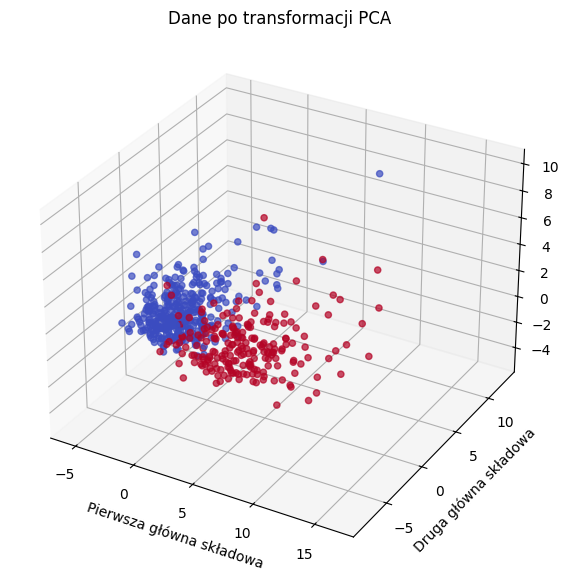

In [117]:
from sklearn.decomposition import PCA

# Inicjalizacja i dopasowanie PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_normalized)

# Wizualizacja danych po transformacji PCA
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_numeric, cmap='coolwarm', alpha=0.7)
plt.title('Dane po transformacji PCA')
plt.xlabel('Pierwsza główna składowa')
plt.ylabel('Druga główna składowa')
# plt.zlabel('Trzecia')
plt.grid()
plt.show()

In [118]:
# Wyjaśniona wariancja
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Wyświetlenie wyjaśnionej wariancji przez poszczególne składowe
print(f"Wyjaśniona wariancja przez poszczególne składowe: {explained_variance}")

Wyjaśniona wariancja przez poszczególne składowe: [0.42864701 0.18376792 0.09146436 0.06391475]


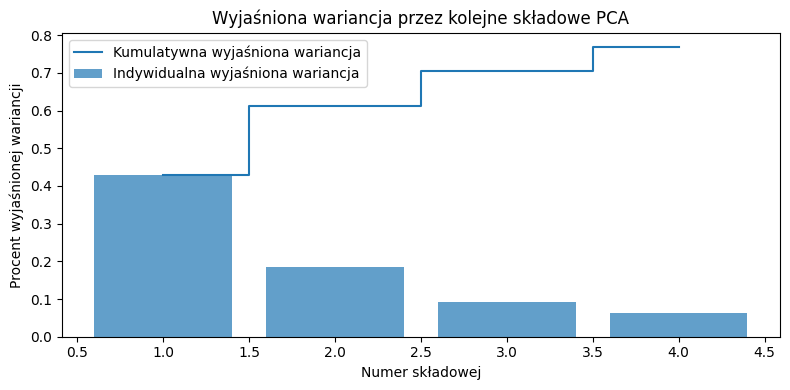

In [119]:
# Scree plot z linią kumulatywnej wyjaśnionej wariancji
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Indywidualna wyjaśniona wariancja')
plt.step(range(1, len(explained_variance) + 1), cumulative_explained_variance, where='mid', label='Kumulatywna wyjaśniona wariancja')
plt.title('Wyjaśniona wariancja przez kolejne składowe PCA')
plt.xlabel('Numer składowej')
plt.ylabel('Procent wyjaśnionej wariancji')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Zadanie dla studentów:

Porównaj wyniki uzyskane przy użyciu ręcznej metody PCA i metody PCA z scikit-learn. Czy wyniki są podobne? Jakie różnice można zauważyć w rozkładzie danych w nowej przestrzeni?

Jakie jest znaczenie wyjaśnionej wariancji i jak można ją interpretować w kontekście PCA?

Czy orientacja wektorów własnych (składowych głównych) jest istotna przy interpretacji wyników PCA? Dlaczego?
W jaki sposób PCA przekształca dane skorelowane na dane nieskorelowane?

Rozwiązania:


##**Krok 4: Ekstrakcja cech i ich selekcja**

Ekstrakcja cech to proces zmniejszania liczby wejściowych zmiennych, kiedy tworzymy model predykcyjny. Proces ten może być zrealizowany przez selekcję (wybór podzbioru istniejących cech) lub ekstrakcję (tworzenie nowych cech z istniejących). Selekcja cech to proces wyboru cech, które przyczyniają się najbardziej do zmiennej docelowej. Cechy, które są nieistotne lub redundantne, mogą być usunięte. Metody selekcji cech mogą być podzielone na trzy główne typy:

**Metody filtrujące (filter methods)**: wykorzystują miary statystyczne do oceny związku cechy ze zmienną docelową i są zazwyczaj niezależne od modeli.

**Metody opakowujące (wrapper methods)**: wykorzystują predykcyjną moc modelu do oceny kombinacji cech.

**Metody wbudowane (embedded methods)**: dokonują selekcji cech podczas procesu trenowania modelu i są specyficzne dla danego modelu.

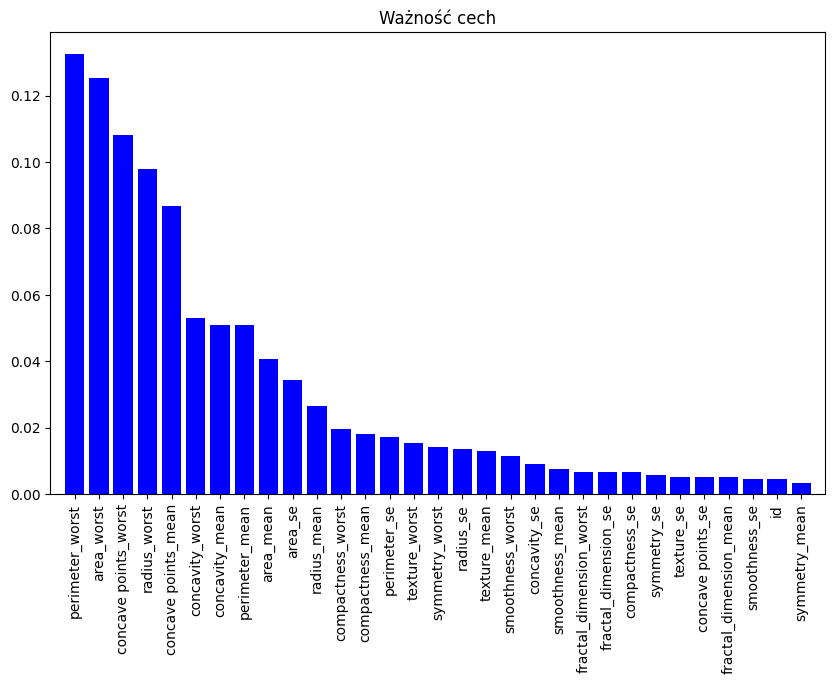

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Podział danych na cechy (X) i etykietę (y)
X = data_cleaned.drop(['diagnosis'], axis=1)
y = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# Podział na zestaw treningowy i testowy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Wczytanie lasu losowego i przeprowadzenie klasyfikacji na danych ze standaryzacją
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
importances = rf_classifier.feature_importances_

# Wizualizacja ważności cech
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Ważność cech")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X_train_scaled.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()


In [121]:
# Wybór i standaryzacja wybranych cech (na przykład 5 najważniejszych)
num_features_selected = 10
selected_indices = indices[:num_features_selected]
X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]

# Wyświetlenie wybranych cech
selected_features = X.columns[selected_indices]
print("Wybrane cechy:")
print(selected_features)

Wybrane cechy:
Index(['perimeter_worst', 'area_worst', 'concave points_worst', 'radius_worst',
       'concave points_mean', 'concavity_worst', 'concavity_mean',
       'perimeter_mean', 'area_mean', 'area_se'],
      dtype='object')


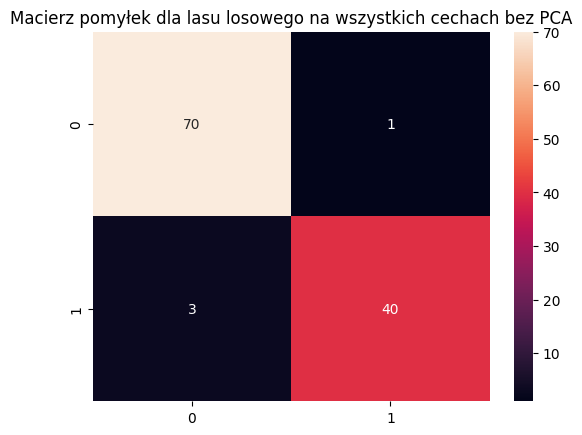

Raport klasyfikacji dla lasu losowego na wszystkich cechach bez PCA:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [122]:
# Wytrenowanie klasyfikatora na wszystkich cechach bez PCA
rf_classifier_full = RandomForestClassifier(random_state=42)
rf_classifier_full.fit(X_train_scaled, y_train)

# Prognozy i metryki dla wszystkich cech bez PCA
rf_predictions_full = rf_classifier_full.predict(X_test_scaled)
rf_confusion_matrix_full = confusion_matrix(y_test, rf_predictions_full)
rf_classification_report_full = classification_report(y_test, rf_predictions_full)

# Wizualizacja macierzy pomyłek dla wszystkich cech bez PCA
sns.heatmap(rf_confusion_matrix_full, annot=True, fmt="d")
plt.title('Macierz pomyłek dla lasu losowego na wszystkich cechach bez PCA')
plt.show()

# Wyświetlenie raportu klasyfikacji dla wszystkich cech bez PCA
print("Raport klasyfikacji dla lasu losowego na wszystkich cechach bez PCA:")
print(rf_classification_report_full)


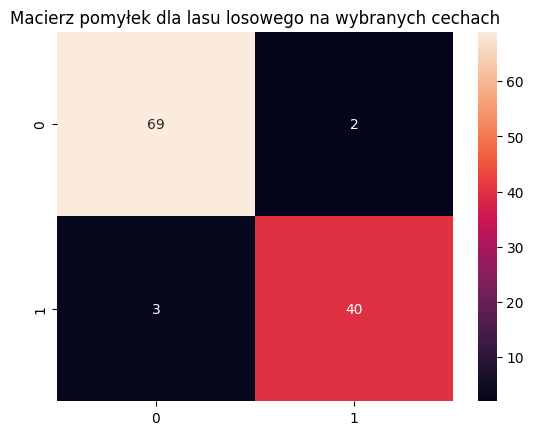

Raport klasyfikacji dla lasu losowego na wybranych cechach:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [123]:
# Klasyfikacja za pomocą RandomForest na wybranych cechach bez PCA
rf_classifier.fit(X_train_selected, y_train)
rf_predictions_selected = rf_classifier.predict(X_test_selected)
rf_accuracy_selected = accuracy_score(y_test, rf_predictions_selected)
rf_confusion_matrix_selected = confusion_matrix(y_test, rf_predictions_selected)

# Wizualizacja macierzy pomyłek i raportu klasyfikacji
sns.heatmap(rf_confusion_matrix_selected, annot=True, fmt="d")
plt.title('Macierz pomyłek dla lasu losowego na wybranych cechach')
plt.show()

print("Raport klasyfikacji dla lasu losowego na wybranych cechach:")
print(classification_report(y_test, rf_predictions_selected))


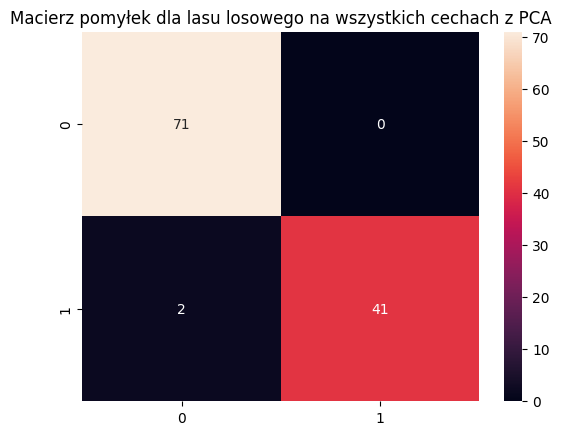

Raport klasyfikacji dla lasu losowego na wszystkich cechach z PCA:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [124]:
# Parametry PCA i podziału na zestawy danych
pca_components = 2  # Liczba głównych składowych do użycia
test_size = 0.2     # Procent danych użytych jako zestaw testowy
random_state = 42   # Parametr losowości dla reprodukowalności wyników

# Inicjalizacja PCA z zadaną liczbą komponentów
pca_all_features = PCA(n_components=pca_components)
X_pca_all_features = pca_all_features.fit_transform(X_normalized)

# Dzielenie na zestaw treningowy i testowy dla wszystkich cech po PCA
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca_all_features, y_numeric, test_size=test_size, random_state=random_state)

# Wytrenowanie klasyfikatora na danych z PCA
rf_classifier_pca = RandomForestClassifier(random_state=random_state)
rf_classifier_pca.fit(X_pca_train, y_pca_train)

# Prognozy i metryki dla wszystkich cech z PCA
rf_predictions_pca = rf_classifier_pca.predict(X_pca_test)
rf_confusion_matrix_pca = confusion_matrix(y_pca_test, rf_predictions_pca)
rf_classification_report_pca = classification_report(y_pca_test, rf_predictions_pca)

# Wizualizacja macierzy pomyłek dla wszystkich cech z PCA
sns.heatmap(rf_confusion_matrix_pca, annot=True, fmt="d")
plt.title('Macierz pomyłek dla lasu losowego na wszystkich cechach z PCA')
plt.show()

# Wyświetlenie raportu klasyfikacji dla wszystkich cech z PCA
print("Raport klasyfikacji dla lasu losowego na wszystkich cechach z PCA:")
print(rf_classification_report_pca)


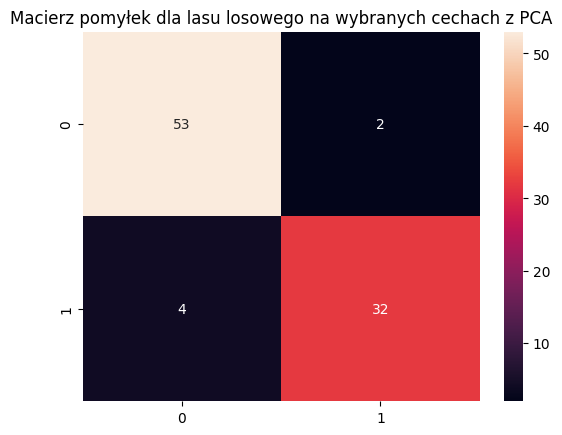

Raport klasyfikacji dla lasu losowego na wybranych cechach z PCA:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.94      0.89      0.91        36

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



In [125]:
# Parametry PCA i podziału na zestawy danych
pca_components_selected = 2  # Liczba głównych składowych do użycia dla wybranych cech
test_size_selected = 0.2     # Procent danych użytych jako zestaw testowy dla wybranych cech
random_state_selected = 42   # Parametr losowości dla reprodukowalności wyników dla wybranych cech

# Inicjalizacja PCA na wybranych cechach z zadaną liczbą komponentów
pca_selected = PCA(n_components=pca_components_selected)
X_pca_selected = pca_selected.fit_transform(X_train_scaled[:, selected_indices])

# Dzielenie na zestaw treningowy i testowy dla wybranych cech po PCA
X_pca_selected_train, X_pca_selected_test, y_pca_selected_train, y_pca_selected_test = train_test_split(
    X_pca_selected, y_train, test_size=test_size_selected, random_state=random_state_selected)

# Wytrenowanie klasyfikatora na danych PCA z wybranymi cechami
rf_classifier_pca_selected = RandomForestClassifier(random_state=random_state_selected)
rf_classifier_pca_selected.fit(X_pca_selected_train, y_pca_selected_train)

# Prognozy i metryki dla wybranych cech z PCA
rf_predictions_pca_selected = rf_classifier_pca_selected.predict(X_pca_selected_test)
rf_confusion_matrix_pca_selected = confusion_matrix(y_pca_selected_test, rf_predictions_pca_selected)
rf_classification_report_pca_selected = classification_report(y_pca_selected_test, rf_predictions_pca_selected)

# Wizualizacja macierzy pomyłek dla wybranych cech z PCA
sns.heatmap(rf_confusion_matrix_pca_selected, annot=True, fmt="d")
plt.title('Macierz pomyłek dla lasu losowego na wybranych cechach z PCA')
plt.show()

# Wyświetlenie raportu klasyfikacji dla wybranych cech z PCA
print("Raport klasyfikacji dla lasu losowego na wybranych cechach z PCA:")
print(rf_classification_report_pca_selected)


Zadania dla studentów:

W jaki sposób liczba wybranych cech wpływa na wydajność modelu? Czy istnieje ryzyko przeuczenia (overfitting) lub niedouczenia (underfitting)?

Jaki wpływ ma normalizacja lub standaryzacja cech na proces selekcji?

Rozwiązania:


## **Ostatni krok: Podsumowanie wyników**

Po zakończeniu ekstrakcji i selekcji cech, ostatnim krokiem jest analiza i interpretacja wyników. W tym etapie sprawdzamy, jak dobrze wybrane cechy radzą sobie w kontekście zadania, dla którego były wybierane - czy to klasyfikacji, regresji czy innego zadania uczenia maszynowego. Analiza może również obejmować ocenę modelu na zbiorze testowym, aby zobaczyć, jak dobrze model generalizuje na nowych danych.

Zadania dla studentów:

Jakie metryki powinny być użyte do oceny modelu w zależności od rodzaju zadania (klasyfikacji, regresji itp.)?

W jaki sposób wybrane cechy wpływają na interpretowalność modelu?

Jak można ocenić, czy model jest dobrze dopasowany do danych?

Rozwiązania:
